# Análise de dados socioeconômicos
Iremos analisar os dados socioeconômicos e complementares dos discentes da Universidade Federal do Rio Grande do Norte - UFRN, a fim de entendermos melhor os perfis de pessoas que entram nessa universidade.

# Sumário
- [Base de Dados](#base-dados)
- [Perguntas orientadoras](#perguntas-orientadoras)
- [Código](#codigo)
  - [Dependências](#dependencias)
  - [Preparando os dados](#preparando-dados)
  - [Analises](#analises)
    - [Renda de ingressantes](#renda)

# <a id="base-dados">Base de Dados</a>
Os dados utilizados formam retirados do site de [dados abertos da UFRN](http://dados.ufrn.br/). Foram utilizados os seguintes conjuntos de dados:

- [Dados Sócio-Econômicos de Discentes](http://dados.ufrn.br/dataset/dados-socio-economicos-de-discentes)
- [Dados Complementares de Discentes](http://dados.ufrn.br/dataset/dados-complementares-de-discentes)
- [Discentes](http://dados.ufrn.br/dataset/discentes)

# <a id="perguntas-orientadoras">Perguntas orientadoras</a>
- Qual a renda dos ingressantes da UFRN?
- 

# <a id="codigo">Código</a>
Agora iremos para a parte em que tentaremos encontrar as respostas das [perguntas orientadoras](#perguntas-orientadoras).

## <a id="dependencias">Dependências</a>
Nessa seção, iremos declarar as dependências necessárias para o Jupyter Notebook executar corretamente, para isso iremos: declarar as variáveis globais que iremos utilizar, importar as libs necessárias e preparar os arquivos que temos para podermos utilizá-los nas seções seguintes.

- [re](https://docs.python.org/3/library/re.html)
- [Numpy](http://www.numpy.org/) as **np**
- [Pandas](https://pandas.pydata.org/) as **pd**
- [Matplotlib](https://matplotlib.org/) as **plt**

```sh
conda install -c conda-forge numpy
conda install -c conda-forge matplotlib
conda install -c conda-forge pandas
```

In [1]:
# Pacotes que iremos utilizar
import re
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

## <a id="preparando-dados">Preparando os dados</a>
Agora iremos criar uma variável chamada **dfs** que conterá os dataframes com os dados socioeconômicos e complementares dos discentes da UFRN. Para isso, além das funções informadas logo a seguir, iremos criar uma função chamada **make_df** que gerará um único DataFrame a partir de uma lista de arquivos.

Funções que irão nos ajudar:
- **[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)**: Ler um arquivo [CSV](https://pt.wikipedia.org/wiki/Comma-separated_values) e gera um DataFrame a partir dele;
  - **sep**: Especifica um delimitador (`default=','`).
- **[pandas.concat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)**: Concatena vários objetos pandas;
  - **ignore_index**: Ignora os indexs dos objetos pandas concatenados (`default=False`).
- **[re.compile](https://docs.python.org/3/library/re.html#re.compile)**: Compila uma expressão regular;
- **[re.search](https://docs.python.org/3/library/re.html#re.search)**: Busca por um padrão em uma string;
- **[filter](https://www.programiz.com/python-programming/methods/built-in/filter)**: Filtra cada um dos itens de um iterável usando uma função;
- **[list](https://www.tutorialspoint.com/python/list_list.htm)**: Pega uma sequência de valores e converte para uma lista.

In [2]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Arquivos da pasta de arquivos de dados
files = listdir('data')

# Filtro aplicado, lista de arquivos que satisfazem o regex
files_filter = {
    'socioeconomicos': list(filter(re.compile(r'dados-socio-economicos-20[0-9]{2}').search, files)),
    'ingressantes': list(filter(re.compile(r'discentes-20[0-9]{2}.csv').search, files))
}

# Variável com os dataframes que iremos usar
dfs = {
    'socioeconomicos': make_df(files_filter['socioeconomicos']),
    'complementares': pd.read_csv('data/dados-pessoais-discentes', sep=';'),
    'cursos': pd.read_csv('data/cursos-de-graduacao.csv', sep=';'),
    'ingressantes': make_df(files_filter['ingressantes']),
}

A função **[pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)** nos fornecerá um sumário dos dados que temos. 

In [6]:
dfs['socioeconomicos'].info()
dfs['complementares'].info()
dfs['cursos'].info()
dfs['ingressantes'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160366 entries, 0 to 160365
Data columns (total 9 columns):
id_discente                          160366 non-null object
ano                                  160366 non-null int64
periodo                              160366 non-null int64
renda                                92825 non-null float64
escola_ens_medio                     92825 non-null object
possui_bolsa_pesquisa                160366 non-null object
possui_auxilio_alimentacao           160366 non-null object
possui_auxilio_transporte            160366 non-null object
possui_auxilio_residencia_moradia    160366 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 11.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372148 entries, 0 to 372147
Data columns (total 14 columns):
id_discente         372148 non-null object
sexo                372148 non-null object
data_nascimento     371427 non-null object
raca                372068 non-null object
estado_

## <a id="analises">Analises</a>
Nessa seção, iremos realizar algumas análises dos dados de discentes, a fim de termos uma melhor visão sobre eles.

Algo interessante que poderiamos analisar inicialmente seria a renda dos ingressantes. Tomemos como base a notícia **[2 em 3 alunos de universidades federais são das classes D e E](https://educacao.estadao.com.br/noticias/geral,2-em-3-alunos-de-universidades-federais-sao-das-classes-d-e-e,10000070529)**.

Para a elaboração da coluna **classe**, iremos utilizar a coluna de **renda** junto aos critérios de classificação econômica presente no site da [ABEP](http://www.abep.org/criterio-brasil).

Iremos também criar a coluna **ano_periodo** que será a junção de duas colunas já existentes: **ano** e **periodo**.

Funções que irão nos ajudar:
- **[pandas.Series.max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)**: Retorna o maior valor da Series;
- **[pandas.cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)**: Segmentar e classificar os valores de objeto pandas. Essa função também é útil para ir de uma variável contínua para uma variável categórica.
  - **labels**: Rótulos atribuidos a partir dos valores inseridos como **bins** (`default=None`);
  - **include_lowest**: Se o primeiro intervalo esquerdo deve ser incluído ou não. (`default=False`).
- **[pandas.Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)**: Aplica o cast no objeto pandas.
- **[pandas.Series.str.cat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.cat.html)**: Concatena as strings da Series.
  - **sep**: Separador das strings concatenadas (`default=None`).

In [32]:
# Limites de renda
bins = [0, 768, 1625, 2705, 4852, 9254, dfs['socioeconomicos']['renda'].max()]

# Labels
labels = ["D-E", "C2", "C1", "B2", "B1", "A"]

# Criamos a coluna classe
dfs['socioeconomicos']['classe'] = pd.cut(
    dfs['socioeconomicos']['renda'], bins, 
    labels=labels, 
    include_lowest=True
)

# Ano periodo
dfs['socioeconomicos']['ano_periodo'] = dfs['socioeconomicos']['ano'].astype(str).str.cat(
    dfs['socioeconomicos'].periodo.astype(str), sep='-'
)

Usaremos a função **[pandas.DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)** para verificarmos as primeiras linhas do nosso DataFrame e ver se a coluna **classe** e **ano_periodo** foram criadas corretamente.

In [33]:
dfs['socioeconomicos'].head()

,id_discente,ano,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,classe,ano_periodo
0,825312813b1a17de107a020b565b72d0,2015,1,202.0,Todo em escola particular,f,t,f,f,D-E,2015-1
1,149560a4d0e7b585febc5a4c2bae1410,2015,1,3500.0,Todo em escola particular,f,f,t,f,B2,2015-1
2,909b29d77b69ba8f3eb5f04434845c3e,2015,1,4000.0,Todo em escola publica,f,f,f,f,B2,2015-1
3,a975fe54fb5f07a01fad54e3b2e61808,2015,1,1457.0,Todo em escola publica,f,t,f,t,C2,2015-1
4,f318ca81231a8e38a11093471e7990ae,2015,1,9000.0,Todo em escola publica,f,f,f,f,B1,2015-1


Agora que temos os discentes classificados por renda, podemos criar um gráfico mostrando a taxa de ingressantes da UFRN de modo que poderemos ver a evolução dos grupos de renda.

Funções que irão nos ajudar:
- **[np.logical_and](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html)**: Aplica o operador lógico AND nos vetores booleanos passados;
- **[plt.figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html)**: Cria uma nova figura;
  - **figsize**: Define o tamanho da figura (tupla de inteiros) (`default=None`).
- **[pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)**: Agrupa as Series do DataFrame;
- **[pandas.Series.count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)**: Conta a quantidade de valores não nulos na Series;
- **[pandas.Series.keys](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.keys.html)**: Chaves para os índices;
- **[pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.values.html)**: Retorna os valores da Series;
- **[plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)**: Traça um valor (X,Y) como linha ou marcador;
  - **label**: Define o rótulo;
  - **linewidth**: Define a largura da linha/marcador.
- **[plt.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)**: Coloca a legenda;
  - **bbox_to_anchor**: Define a posição da legenda (uso conjunto com o **loc**);
  - **loc**: A localização da legenda.
- **[plt.xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html)**: Define o rótulo do eixo X;
- **[plt.ylabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html)**: Define o rótulo do eixo Y;
- **[plt.title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html)**: O título da figura;
- **[plt.show](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html)**: Mostra a figura.

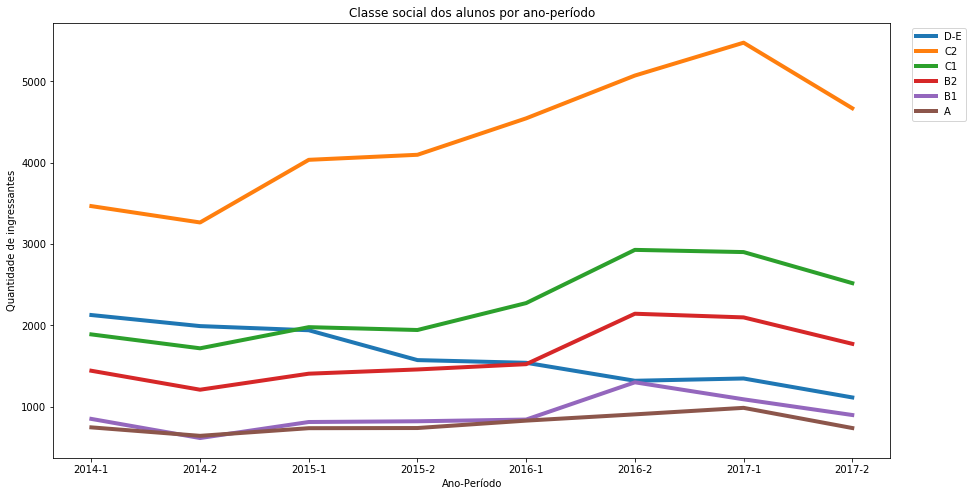

In [34]:
# DataFrame para o gráfico (filtro de 2014 - 2017)
df_graph_classe = dfs['socioeconomicos'][np.logical_and(
    dfs['socioeconomicos']['ano'] > 2013, dfs['socioeconomicos']['ano'] < 2018
)]

# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Linhas do gráfico para cada classe
for label in labels:
    classe_count = df_graph_classe[df_graph_classe['classe'] == label].groupby('ano_periodo')['id_discente'].count()
    plt.plot(classe_count.keys(), classe_count.values, label=label, linewidth=4)

# Demais configurações do gráfico
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlabel('Ano-Período')
plt.ylabel('Quantidade de ingressantes')
plt.title('Classe social dos alunos por ano-período')
plt.show()

**DEBATE**.
- ["O futuro não ia ser assim": Pobreza extrema volta a crescer no Brasil](https://brasil.elpais.com/brasil/2018/05/22/politica/1526941832_202640.html)